# Задание 1

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
water = pd.read_csv('water.csv')

In [4]:
mort_hard = water[['mortality', 'hardness']]
mort_hard.head(20)

,mortality,hardness
0,1247,105
1,1668,17
2,1466,5
3,1800,14
4,1609,18
5,1558,10
6,1807,15
7,1299,78
8,1637,10
9,1359,84


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

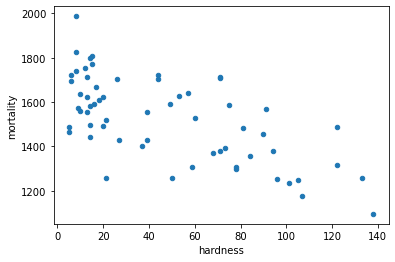

In [6]:
mort_hard.plot(kind='scatter', x='hardness', y='mortality')

In [7]:
mort_hard[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [8]:
mort_hard[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Вывод: связь между жёсткостью воды и средней годовой смертностью есть (обратная), корреляция среднего уровня

In [83]:
x_train, x_test, y_train, y_test = train_test_split(mort_hard[['hardness']], mort_hard[['mortality']], test_size=0.30, random_state=42)
x_train.shape
y_train.shape

model = LinearRegression()
model.fit(x_train, y_train) 

LinearRegression()

In [84]:
model.coef_

array([[-3.13167087]])

In [85]:
model.intercept_

array([1668.97229773])

In [86]:
y_pred = model.predict(x_test)
y_pred

array([[1340.14685615],
       [1637.65558901],
       [1625.12890552],
       [1531.17877935],
       [1424.7019697 ],
       [1606.33888028],
       [1252.46007173],
       [1434.09698232],
       [1603.20720941],
       [1650.18227249],
       [1484.20371627],
       [1415.30695708],
       [1546.83713371],
       [1625.12890552],
       [1446.62366581],
       [1546.83713371],
       [1637.65558901],
       [1621.99723465],
       [1352.67353964]])

In [87]:
model.score(x_test, y_test)

0.5046490611017092

Прогноз получился не особо внушительный, коэффициент детерминации далек от 1

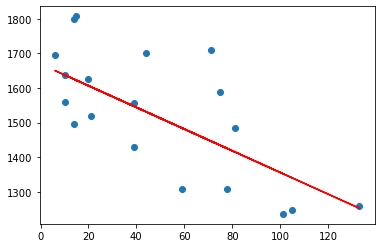

In [88]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

<AxesSubplot:ylabel='Frequency'>

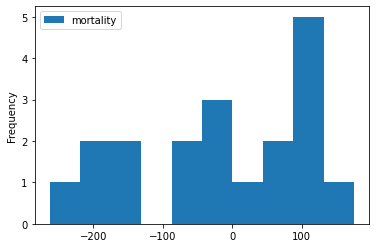

In [89]:
leftovers = y_pred - y_test
leftovers.plot(kind='hist', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

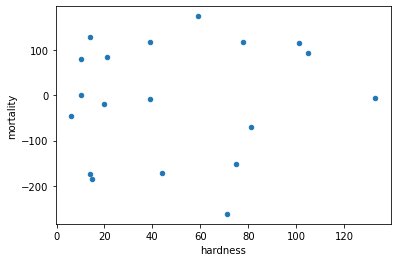

In [90]:
leftovers['hardness'] = x_test
leftovers.plot(kind='scatter', x='hardness', y='mortality')

# Задание 2

In [91]:
north = water.loc[water['location'] == 'North',['mortality', 'hardness']]
south = water.loc[water['location'] == 'South',['mortality', 'hardness']]

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

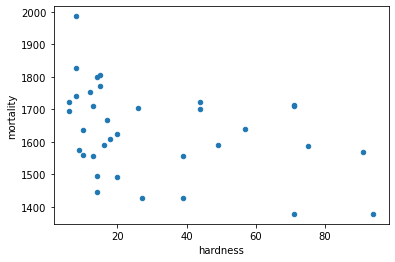

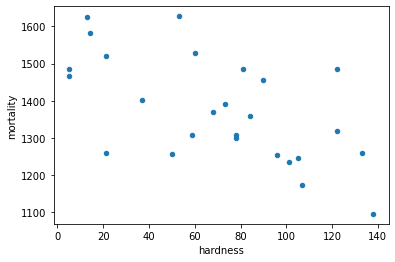

In [92]:
north.plot(kind='scatter', x='hardness', y='mortality')
south.plot(kind='scatter', x='hardness', y='mortality')

Визуально зависимость стала хуже, особенно для южных городов

In [93]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


так и есть, коэффициент корреляции снизился для северных городов

In [94]:
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [95]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [96]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [97]:
x_train, x_test, y_train, y_test = train_test_split(north[['hardness']], north[['mortality']], test_size=0.30, random_state=42)
x_train.shape
y_train.shape

model_north = LinearRegression()
model_north.fit(x_train, y_train)

LinearRegression()

In [98]:
model_north.coef_

array([[-1.97686226]])

In [99]:
model_north.intercept_

array([1688.15022903])

In [100]:
y_pred_north = model_north.predict(x_test)
y_pred_north

array([[1672.33533095],
       [1670.35846869],
       [1660.47415739],
       [1676.28905547],
       [1656.52043287],
       [1547.79300857],
       [1601.16828959],
       [1672.33533095],
       [1611.05260089],
       [1658.49729513],
       [1611.05260089]])

In [101]:
model_north.score(x_test, y_test)

0.018885304285745863

очень маленький коэффициент детерминации, прогноз будет недостоверный

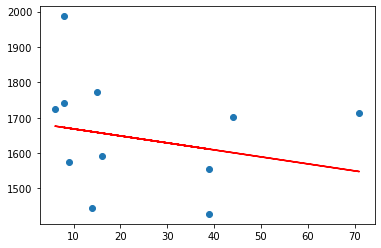

In [102]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_north, c='r')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

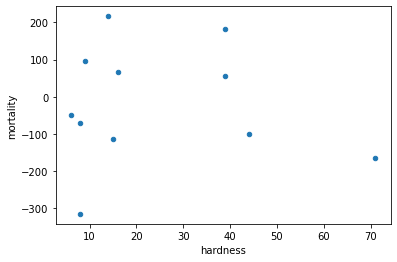

In [103]:
left_north = y_pred_north - y_test
left_north['hardness'] = x_test
left_north.plot(kind='scatter', x='hardness', y='mortality')

In [104]:
x_train, x_test, y_train, y_test = train_test_split(south[['hardness']], south[['mortality']], test_size=0.30, random_state=42)
x_train.shape
y_train.shape

model_south = LinearRegression()
model_south.fit(x_train, y_train)

LinearRegression()

In [105]:
model_south.coef_

array([[-3.51342921]])

In [106]:
model_south.intercept_

array([1640.22046034])

In [107]:
y_pred_south = model_south.predict(x_test)
y_pred_south

array([[1211.58209643],
       [1622.65331428],
       [1271.31039304],
       [1211.58209643],
       [1510.22357948],
       [1566.43844688],
       [1432.92813681],
       [1622.65331428]])

In [108]:
model_south.score(x_test, y_test)

-2.551922301235205

наша модель наошибалась больше, чем наивная, поэтому для прогноза она не пригодна

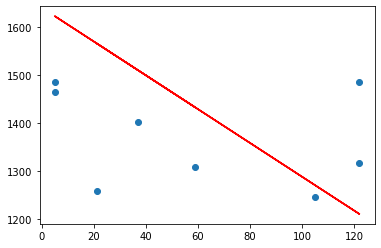

In [109]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_south, c='r')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

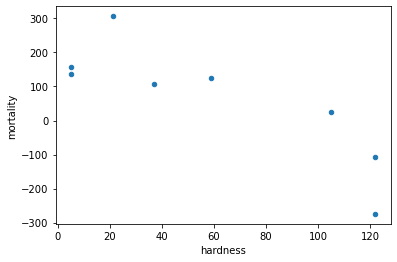

In [110]:
left_south = y_pred_south - y_test
left_south['hardness'] = x_test
left_south.plot(kind='scatter', x='hardness', y='mortality')